<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_11_18_252_277.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 08 분류 실습- 캐글 산탄데르 고객 만족 예측

1이면 불만, 0이면 만족으로 xgboost와 lightgbm을 활용하여 예측해보고자 함

#### 데이터전처리


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/train_santander.csv', encoding='latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head(3)


dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.039569


In [18]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [4]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

#피처세트와 레이블 세트 분리. 레이블칼럼은 DataFrame의 맨 마지막에 위치해 칼럼위치 -1로 분리
X_features=cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:,-1]
print('피처데이터 shape:{0}'.format(X_features.shape))


피처데이터 shape:(76020, 369)


In [5]:
#학습과 성능평가를 위해 원본데이터에서 학습 데이터세트와 테스트 데이터세트로 분리
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt=y_train.count()
test_cnt = y_test.count()
print('학습세트 shape:{0}, 테스트세트shape: {1}'.format(X_train.shape, X_test.shape))

print('학습세트 레이블값 분포비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트세트 레이블값 분포비율')
print(y_test.value_counts()/test_cnt)


학습세트 shape:(60816, 369), 테스트세트shape: (15204, 369)
학습세트 레이블값 분포비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트세트 레이블값 분포비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


#### XGBost 모델학습과 하이퍼파라미터 튜닝

XGBoost의 학습모델을 생성하고 예측 결과를 ROC AUC로 평가하되 XGBClassifier로 학습을 수행.(n_estimator = 500, early_stopping_rounds=100)



In [6]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

#n_estimator = 500, for resulting same, set random_state
xgb_clf = XGBClassifier(n_estimator=500, random_state = 156)

#성능평가지표 == auc, early_stopping_rounds = 100
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

In [9]:
#하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV

#하이퍼파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7],'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}

#cv =3
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train),(X_test, y_test)])

print('gridserachcv best parameter:', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='marco')
print('ROC AUC: {0:4f}'.format(xgb_roc_score))




[0]	validation_0-auc:0.715421	validation_1-auc:0.722463
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.802772	validation_1-auc:0.807648
[2]	validation_0-auc:0.800147	validation_1-auc:0.804566
[3]	validation_0-auc:0.805692	validation_1-auc:0.809325
[4]	validation_0-auc:0.814807	validation_1-auc:0.816951
[5]	validation_0-auc:0.810346	validation_1-auc:0.812634
[6]	validation_0-auc:0.810623	validation_1-auc:0.814491
[7]	validation_0-auc:0.818556	validation_1-auc:0.820561
[8]	validation_0-auc:0.822006	validation_1-auc:0.823553
[9]	validation_0-auc:0.820433	validation_1-auc:0.821292
[10]	validation_0-auc:0.826212	validation_1-auc:0.825279
[11]	validation_0-auc:0.830077	validation_1-auc:0.827817
[12]	validation_0-auc:0.832328	validation_1-auc:0.828775
[13]	validation_0-auc:0.832008	validation_1-auc:0.827865
[14]	validation_0-auc:0.830319	validation_1-auc:0.82674

KeyboardInterrupt: ignored

In [35]:
#n_estimators = 1000, learning_rate =0.02, reg_alpha = 0.03
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156,learning_rate = 0.02,
                        max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

#성능 평가 지표를 AUC로, early stopping rounds = 200로 지정
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200,eval_metric = "auc",
            eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average ='macro')
print('ROCAUC{0:.4f}'.format(xgb_roc_score))


[0]	validation_0-auc:0.82311	validation_1-auc:0.815226
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.827094	validation_1-auc:0.816566
[2]	validation_0-auc:0.832027	validation_1-auc:0.820393
[3]	validation_0-auc:0.835873	validation_1-auc:0.825019
[4]	validation_0-auc:0.838197	validation_1-auc:0.826078
[5]	validation_0-auc:0.837948	validation_1-auc:0.827282
[6]	validation_0-auc:0.8381	validation_1-auc:0.826888
[7]	validation_0-auc:0.838475	validation_1-auc:0.827131
[8]	validation_0-auc:0.839775	validation_1-auc:0.828198
[9]	validation_0-auc:0.83981	validation_1-auc:0.827834
[10]	validation_0-auc:0.841664	validation_1-auc:0.828996
[11]	validation_0-auc:0.841069	validation_1-auc:0.82802
[12]	validation_0-auc:0.841167	validation_1-auc:0.828517
[13]	validation_0-auc:0.841455	validation_1-auc:0.828317
[14]	validation_0-auc:0.845308	validation_1-auc:0.834099
[1

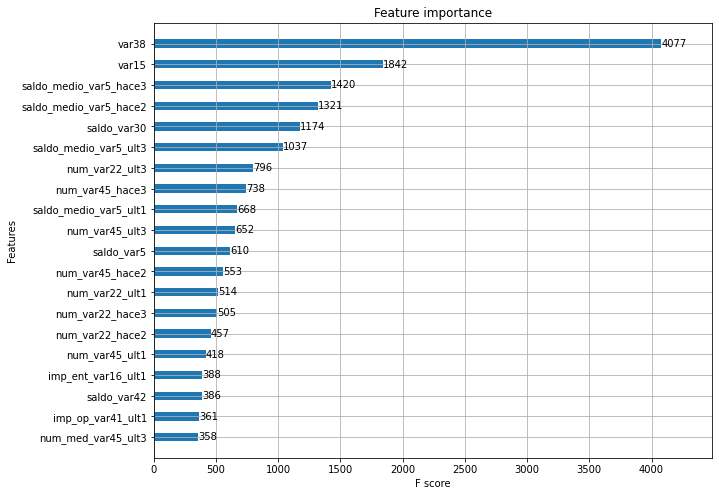

In [37]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax= plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)


#### LightGBM 모델학습과 하이퍼파라미터 튜닝



In [39]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100,
            eval_metric = "auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average ='macro')
print('ROCAUC{0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's binary_logloss: 0.165046	valid_0's auc: 0.817384
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.16	valid_0's auc: 0.81863
[3]	valid_0's binary_logloss: 0.156287	valid_0's auc: 0.827411
[4]	valid_0's binary_logloss: 0.153416	valid_0's auc: 0.832175
[5]	valid_0's binary_logloss: 0.151206	valid_0's auc: 0.83481
[6]	valid_0's binary_logloss: 0.149303	valid_0's auc: 0.834721
[7]	valid_0's binary_logloss: 0.147804	valid_0's auc: 0.83659
[8]	valid_0's binary_logloss: 0.146466	valid_0's auc: 0.837602
[9]	valid_0's binary_logloss: 0.145476	valid_0's auc: 0.838114
[10]	valid_0's binary_logloss: 0.144681	valid_0's auc: 0.838472
[11]	valid_0's binary_logloss: 0.143978	valid_0's auc: 0.83808
[12]	valid_0's binary_logloss: 0.14341	valid_0's auc: 0.837771
[13]	valid_0's binary_logloss: 0.142835	valid_0's auc: 0.838063
[14]	valid_0's binary_logloss: 0.142296	valid_0's auc: 0.838485
[15]	valid_0's binary_logloss: 0.141903	valid_0's auc: 0.83

In [47]:
from sklearn.model_selection import GridSearchCV

#for improving hyper parameter test, n_estimators = 200
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32, 64],
          'max_depth':[128,160],
          'min_child_samples':[60, 100],
          'subsample':[0.8,1]}
#cv=3
gridcv=GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train),(X_test, y_test)])
print('GrisSearchCV best parameter:',gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='marco')
print('ROC AUC:{0:.4f}'.format(lgbm_roc_scroe))


[1]	valid_0's binary_logloss: 0.156085	valid_0's auc: 0.820235	valid_1's binary_logloss: 0.164992	valid_1's auc: 0.81613
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's binary_logloss: 0.150951	valid_0's auc: 0.825778	valid_1's binary_logloss: 0.159874	valid_1's auc: 0.821835
[3]	valid_0's binary_logloss: 0.147167	valid_0's auc: 0.832192	valid_1's binary_logloss: 0.156391	valid_1's auc: 0.827305
[4]	valid_0's binary_logloss: 0.144132	valid_0's auc: 0.837507	valid_1's binary_logloss: 0.15332	valid_1's auc: 0.8334
[5]	valid_0's binary_logloss: 0.141652	valid_0's auc: 0.842275	valid_1's binary_logloss: 0.150954	valid_1's auc: 0.836036
[6]	valid_0's binary_logloss: 0.139662	valid_0's auc: 0.844971	valid_1's binary_logloss: 0.149041	valid_1's auc: 0.838026
[7]	valid_0's binary_logloss: 0.138002	valid_0's auc: 0.846612	valid_1's binary_logloss: 0.147504	valid_1's auc: 0.837776
[8]	valid_0's binary_logloss: 0.136579	valid_0's auc: 0.848539	valid_1's binary_logloss:

ValueError: ignored

In [50]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100,
                         max_depth=128)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
             verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predcit_proba(X_test))
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's binary_logloss: 0.165016	valid_0's auc: 0.819488
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.159711	valid_0's auc: 0.822387
[3]	valid_0's binary_logloss: 0.156068	valid_0's auc: 0.829542
[4]	valid_0's binary_logloss: 0.153141	valid_0's auc: 0.834917
[5]	valid_0's binary_logloss: 0.150804	valid_0's auc: 0.837871
[6]	valid_0's binary_logloss: 0.148876	valid_0's auc: 0.839548
[7]	valid_0's binary_logloss: 0.147225	valid_0's auc: 0.841812
[8]	valid_0's binary_logloss: 0.14594	valid_0's auc: 0.842382
[9]	valid_0's binary_logloss: 0.144866	valid_0's auc: 0.842811
[10]	valid_0's binary_logloss: 0.143872	valid_0's auc: 0.843186
[11]	valid_0's binary_logloss: 0.14305	valid_0's auc: 0.843465
[12]	valid_0's binary_logloss: 0.142376	valid_0's auc: 0.843222
[13]	valid_0's binary_logloss: 0.141783	valid_0's auc: 0.843564
[14]	valid_0's binary_logloss: 0.141419	valid_0's auc: 0.843389
[15]	valid_0's binary_logloss: 0.141	valid_0's auc: 

AttributeError: ignored

### 09 분류 실습 - 캐글 신용카드 사기검출

데이터 세트의 레이블인 class 속성은 불균형한 분포를 가지는데, 사기가 아닌 정상적인 신용카드 거래인 0고 사기 거래인 1로 나뉘는데 이것이 전체 거래의 0.172퍼센트를 차지함

#### 언더 샘플링과 오버 샘플링의 이해
- 레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬 때 예측 성능의 문제가 발생할 수 있는데 이는 이상 건수가 정상 건수에 비해 너무 적기 때문에 발생

- 지도학습에서 불균형한 레이블값 분포로 인한 문제를 해결하기 위해서는 적절한 학습 데이터를 확보하는 방안이 필요, 대표적으로 오버 샘플링과 언더 샘플링이 사용됨

- 언더샘플링은 많은 데이터 세트를 적은 데이터 수준으로 감소시키는 방식으로, 정상 레이블을 가진 데이터가 만건, 이상이 100건 있을 경우 정상 데이터를 100건 수준으로 줄여버리는 방식. 과도하게 정상 레이블로 학습/예측하는 부작용을 개선할 수 있긴 하나, 너무 많은 정상 레이블을 감소시키기 때문에 정상 레이블이 오히려 제대로 된 학습을 못하게 되어 잘 쓰지 않음

- 오버 샘플링은 이상데이터를 증식시켜 충분한 데이터를 확보하는 방법으로 동일 데이터를 단순 증식시킬 경우 과적합 문제가 발생하기 때문에 원본 데이터의 피처값을 아주 약간 변경하여 증식함. SMOTE라는 대표적인 방법을 사용하는데, 이는 적은 데이터 세트에 있는 개별 데이터의 k 최근접 이웃을 찾아 이 데이터와 k개 이웃들의 차이를 일정 값으로 만들어 기존 데이터와 약간 차이가 나는 새 데이터를 생성하는 방식

#### 데이터 일차 가공 및 모델 학습/예측/평가


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [44]:
# diverse data 사전가공공, 이에에 따른른 예측측 성능능 비교하기기
# 데이터프레임을을 복사한한 뒤뒤 이를를 가공하여여 반환하는는 get_preprocessed_df() 함수수 생성성
#데이터터 가공공 후후 학습습/테스트트 데이터터 세를를 반환하는는 get_train_test_df()  함수수 생성성
from sklearn.model_selection import train_test_split

#인자로 입력받은은 dataframe을을 복사한한 뒤뒤 time column만만 ㅎ삭제하고고 복사된된 dataframe 반환환
def get_preprocessed_df(df=None):
  df_copy= df.copy()
  df_copy.drop('Time', axis=1, inplace=True)
  return df_copy

In [45]:
# 사전전 데이터터 가공공 후후 학습과 테스트데이터 세트를를 반환하는는 함수수
def get_train_test_dataset(df=None):
  #인자로로 입력된된 데이터프레임의의 사전데이터터 가공이이 완료된된 복사사 데이터프레임임 반환환
  df_copy = get_preprocessed_df(df)
  #dataframe의의 맨맨 마지막막 칼럼이이 레이블블, 나머지는는 피처처
  X_features = df_copy.iloc[:, :-1]
  y_target = df_copy.iloc[:,-1]
  #trian_test_split으로로 학습과테스트데이터터 세트트 분할할, stratify=y_target으로로 stratified 기반반 분할할
  X_train, X_test, y_train, y_test = \
  train_test_split(X_features, y_target, test_size = 0.3, random_state=0, stratify=y_target)
  #학습과테스트데이터터 세트트 반환환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [46]:
print('학습습 데이터터 레이블값값 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('테스트 데이터 레이블값값 비율')
print(y_test.value_counts()/y_test.shape[0]*100)


학습습 데이터터 레이블값값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블값값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [47]:
#get clf eval!
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [48]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred=lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

#3장에서서 사용한한 get_clf_eval() 함수를를 이용하여여 평가가 수행행
get_clf_eval(y_test, lr_pred, lr_pred_proba)


오차 행렬
[[85281    14]
 [   56    92]]
정확도: 0.9992, 정밀도: 0.8679, 재현율: 0.6216,    F1: 0.7244, AUC:0.9609


In [49]:
#with lightgbm, train predict test
#인자로로 사이킷런의의 estimator 객체와와 학습습/테스트트 데이터세트를를 입력받아아 학습습/예측측/평가가 수행행
def get_model_train_eval(model, ftr_train =None, ftr_test=None, tgt_train=None, tgt_test=None):
  model.fit(ftr_train, tgt_train)
  pred=model.predict(ftr_test)
  pred_proba = model.predict_proba(ftr_test)[:, 1]
  get_clf_eval(tgt_test, pred, pred_proba)
  

In [50]:
#train with lightgbm, predcit and test with another test dataset
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves = 64, n_jobs = -1, boost_from_averag=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[85178   117]
 [   86    62]]
정확도: 0.9976, 정밀도: 0.3464, 재현율: 0.4189,    F1: 0.3792, AUC:0.7086


#### 데이터 분포도 변환 후 모델 학습/예측/평가

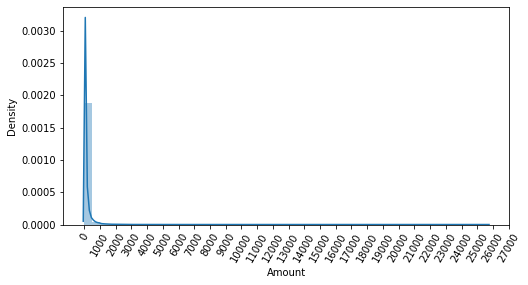

In [51]:
#왜곡된된 분포도의의 데이터터 재가공후후 모델델 테스트트
# amount 피처는는 신용카드드 사용금액으로 정상상/사기기 거래를를 결정하는는 매우우 중요한한 속성일일 가능성이이 높음음

import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])


In [52]:
#amount가가 1000불불 아래인인 데이터가가 대부분이나나 많은은 금액을을 사용한한 경우가가 발생하며며
#꼬리가가 ㄱ긴긴 형태의의 분포곡선을을 가짐짐
#amount를를 표준준 정규분포포 형태로로 변환한한 뒤뒤 로지스틱틱 회귀의의 예측측 성능을을 측정해보고자자 함함

from sklearn.preprocessing import StandardScaler
#사이킷런의의 standardscaler를를 이용해해 정규분포포 형태로로 amount 피처값값 변환하는 로직으로로 수정
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [42]:
#Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및  light gbm 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

TypeError: ignored

In [53]:
def get_preprocessed_df(df=None):
  df_copy=df.copy()
  #넘파이의 log1p()를 이용, amount의 로그변환
  amount_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  return df_copy
  

In [54]:
#amount피처의 로그변환 후 다시 로지스틱 회귀와 lgbm 적용
X_trian, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### logistic 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train = X_train, ftr_test = X_test, tgt_train=y_train,
                     tgt_test = y_test)
print('### lightgbm 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test= X_test, tgt_train=y_train,
                     tgt_test = y_test)


### logistic 회귀 예측 성능 ###
오차 행렬
[[85266    29]
 [  145     3]]
정확도: 0.9980, 정밀도: 0.0938, 재현율: 0.0203,    F1: 0.0333, AUC:0.6513
### lightgbm 예측 성능 ###
오차 행렬
[[85232    63]
 [  148     0]]
정확도: 0.9975, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.4996


#### 이상치 데이터 제거 후 모델 학습/예측/평가

이상치 데이턴ㄴ 전체 데이터의 패턴에서 벗어난 이상값을 가진 데이터로 아웃라이어라 불림

모델 성능에 영향을 끼칠 수 있기에 이를 찾아보고 처리하는 방법에 대해 알아보고자 함

IQR - 사분위 값의 편차를 이용하는 방법을 이용, 사분위란 전체 데이터를 전체 데이트를 값이 높은 순으로 정렬한 후 1/4씩 분할하는데 이 떄, q1~13을 iqr이라 함

iqr에 1.5를 곱해 생성된 범위를 이용하여 최대, 최소값을 결정한 뒤 최댓값을 초과하거나 최솟값에 미달하는 데이터를 이상치로 간주하는 방식으로 1.5가 아닌 값을 곱할 수 있음


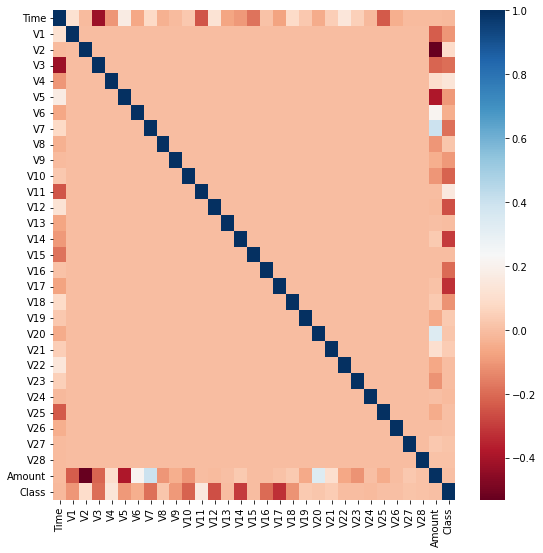

In [55]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr =card_df.corr()
sns.heatmap(corr, cmap='RdBu')
#색이 진할 수록 양의 상관관계 큼
#결정 래이블 클래스와 상관관계가 가장 큰 것은 v14, v17로 그중 14에 대해 이상치 검출 및 제거

In [56]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  #frauddㅔ 해당하는 column데이터만 추출, 1/4분위와 3/4분위 지점을 np.percentile로 구함
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values,25)
  quantile_75 = np.percentile(fraud.values,75)
  #iqr을 구하고 iqr에 1.5를 곱해 최댓값과 최솟값 지점 구함
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr * weight
  lowest_val = quantile_25 + iqr_weight
  hightest_val = quantile_75 + iqr_weight
  #최댓값보다 크거나 최솟값보다 작은 값을 이상치 데이터로 설정하고 dataframe index반환
  outlier_index = fraud[(fraud>lowest_val)| (fraud>hightest_val)].index
  return outlier_index

In [57]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)


이상치 데이터 인덱스: Int64Index([  4920,  10484,  10497,  10498,  14104,  20198,  27362,  29687,
             50537,  52521,  55401,  56703,  57248,  58422,  58761,  68067,
             68633,  72757,  74794,  91671,  95534,  96341, 100623, 101509,
            102782, 108258, 112840, 118308, 119714, 124036, 131272, 142557,
            144754, 145800, 146790, 151103, 151196, 152019, 154234, 154286,
            154587, 154684, 157585, 157918, 176049, 191074, 191267, 213092,
            214775, 219025, 222419, 239501, 245347, 249239, 254395, 263080,
            272521, 274382, 275992],
           dtype='int64')


In [58]:
#get_preprocessed_df()를 로그변환 후 v14 피처의 이상치 데이터를 삭제하는 로직으로 변경
def get_preprocessed_df(df=None):
  df_copy = df.copy()
  amout_n = np.log1p(df_copy['Amount'])
  df_copy.insert(0, 'Amount_Scaled', amount_n)
  df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
  #이상치 데이터 삭제하는 로직 추가
  outlier_index = get_outlier(df=df_copy, column='V14', weight =1.5)
  df_copy.drop(outlier_index, axis=0, inplace=True)
  return df_copy

In [59]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train= X_train, ftr_test = X_test, tgt_train = y_train,
                     tgt_test = y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train = X_train, ftr_test = X_test, tgt_test = y_train, tgt_test = y_test)
print('### lightgbm 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train = y_train, tgt_test=y_test)

SyntaxError: ignored

이상치 데이터 제거 후 예측 성능 대폭 증가

#### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [60]:
print(cust_df.var3.value_counts()[:10])

2     74281
8       138
9       110
3       108
1       105
13       98
7        97
4        86
12       85
6        82
Name: var3, dtype: int64


In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print('smote 적용 전 학습 피처 레이블 데이터 세트', X_train.shape, y_train.shape)
print('after smote, train feature dataset', X_train_over.shape, y_train_over.shape)

print('after swote label distribution', pd.Series(y_train_over).value_counts())


smote 적용 전 학습 피처 레이블 데이터 세트 (199364, 29) (199364,)
after smote, train feature dataset (398040, 29) (398040,)
after swote label distribution 0    199020
1    199020
Name: Class, dtype: int64


In [63]:
lr_clf = LogisticRegression()
#ftr_train과 tgt_train 인자값이이 SWOTE 증식된된 X_train_over와와 y_train_over로로 변경됨에에 유의의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test = X_test, tgt_train = y_train_over,
                     tgt_test = y_test)
#로지스틱틱 회귀의 경우우 오버샘플링된된 데이터로로 학습할할 경우우 재현율이이 크게게 증가가, 정밀도도 급격격 감소소


오차 행렬
[[64072 21223]
 [   87    61]]
정확도: 0.7506, 정밀도: 0.0029, 재현율: 0.4122,    F1: 0.0057, AUC:0.5636


In [64]:
#precision recall curve plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()


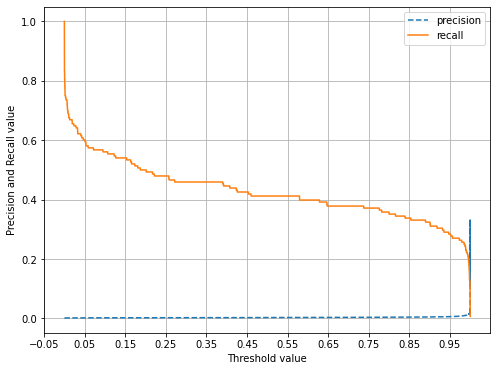

In [65]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])
#임계값값 0.99 이하에서는는 재현율도도 매우우 좋고고 정밀도가가 극단적으로로 낮다가가
#0.99에서서 재현율이이 대폭폭 감소하고고 정밀도가가 대폭폭 증가
# lightgbm 모델을을 SWOTE로로 오버샘플링링 후후 학습습 예측측 평가가 수행

In [66]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves = 64, n_jobs=-1, boost_from_average = False)
get_model_train_eval(lgbm_clf, ftr_train = X_train_over, ftr_test = X_test, 
                     tgt_train= y_train_over, tgt_test=y_test)


오차 행렬
[[85195   100]
 [  148     0]]
정확도: 0.9971, 정밀도: 0.0000, 재현율: 0.0000,    F1: 0.0000, AUC:0.1911
